In [1]:
from configparser import ConfigParser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.graph_objs import Scatter, Layout, Heatmap
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py

## Configure chart studio for interactive chart hosting

In [2]:
#create your account in https://chart-studio.plotly.com/
#add credentials to 'conf/plotly.ini'
conf=ConfigParser()
conf.read('conf/plotly.ini')
username=conf['plotly']['username']
api_key=conf['plotly']['apikey']
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

## Load data

In [3]:
df_male_w2v=pd.read_csv('data/interim/gender_bias/separated/bias_male_w2v.csv', index_col=0)
df_female_w2v=pd.read_csv('data/interim/gender_bias/separated/bias_female_w2v.csv', index_col=0)
df_male_w2v['gender']='male'
df_male_w2v['color']='blue'
df_female_w2v['gender']='female'
df_female_w2v['color']='orange'
df_w2v=df_female_w2v.append(df_male_w2v)

df_male_ft=pd.read_csv('data/interim/gender_bias/separated/bias_male_ft.csv', index_col=0)
df_female_ft=pd.read_csv('data/interim/gender_bias/separated/bias_female_ft.csv', index_col=0)
df_male_ft['gender']='male'
df_male_ft['color']='blue'
df_female_ft['gender']='female'
df_female_ft['color']='orange'
df_ft=df_female_ft.append(df_male_ft)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_50852\1794874989.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w2v=df_female_w2v.append(df_male_w2v)
C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_50852\1794874989.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ft=df_female_ft.append(df_male_ft)


In [4]:
df_male_w2v.shape, df_female_w2v.shape

((564, 9), (707, 9))

In [5]:
df_male_ft.shape, df_female_ft.shape

((1330, 9), (331, 9))

## Simple visualization

In [6]:
def plot_gender_scatter(df_male, df_female, x_col='x', y_col='y', female_color='orange', male_color='blue',
                       alpha_female=1.0, alpha_male=0.1):
    ax=sns.scatterplot(data=df_male, x=x_col, y=y_col, color=male_color, alpha=alpha_male)
    ax=sns.scatterplot(data=df_female, x=x_col, y=y_col, color=female_color, alpha=alpha_female, ax=ax)

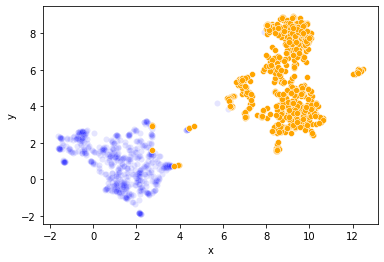

In [7]:
#w2v
plot_gender_scatter(df_male_w2v, df_female_w2v)

In [8]:
def make_plotly_scatter(df, filename, title, x_col='x', y_col='y', color_col='color',
                        opacity=0.5, save_folder='visualisations'):
    # Create a trace containing the scatter plot
    scatter = go.Scatter(x = df[x_col],
                         y = df[y_col], 
                         mode = 'markers', \
                         marker= dict(size= 18, opacity = opacity, color = df[color_col],\
                                      line = dict(width = 2, color = 'rgb(0, 0, 0)')),
                         text = df.index.astype(str))

    # Collect the trace(s) into the data to be plotted.
    data = [scatter]

    # Edit the layout
    layout = dict(title = title,
                  xaxis = dict(title = 'x'),
                  yaxis = dict(title = 'y'),
                  hovermode = 'closest',
                  )

    # Define the figure
    fig = dict(data=data, layout=layout)

    # Save figure and layout into html file
    plot_url = plotly.offline.plot(fig, filename=f'{save_folder}/{filename}.html')
    py.plot(fig, filename=filename, auto_open = True)

In [9]:
make_plotly_scatter(df_w2v, filename='scatter_gender_bias_w2v_embeddings',
                   title='Riigikogu gender bias word2vec embeddings')

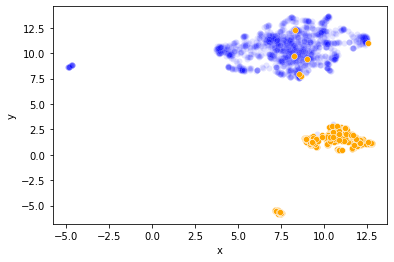

In [10]:
#ft
plot_gender_scatter(df_male_ft, df_female_ft)

In [11]:
make_plotly_scatter(df_ft, filename='scatter_gender_bias_ft_embeddings',
                   title='Riigikogu gender bias fastext embeddings')

## See clusters

### Cluster sizes (no of unique words)

#### w2v female HDB

<AxesSubplot:>

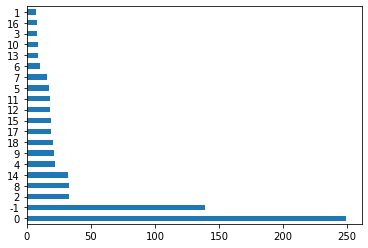

In [8]:
df_female_w2v.cluster_hdb.value_counts().plot(kind='barh')

#### w2v female Agglomerative clust

<AxesSubplot:>

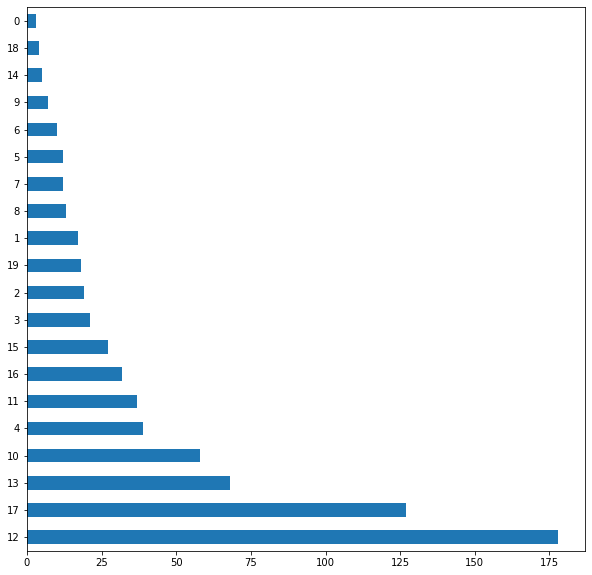

In [9]:
#agglomerative clustering
fig, ax =plt.subplots(figsize=(10, 10))
df_female_w2v.clust_ag.value_counts().plot(kind='barh', ax =ax)

#### FT female HDB

<AxesSubplot:>

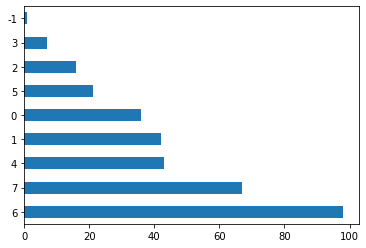

In [10]:
df_female_ft.cluster_hdb.value_counts().plot(kind='barh')

#### FT female Agglomerative clust

<AxesSubplot:>

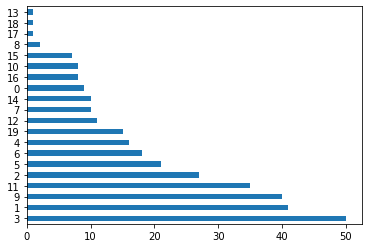

In [11]:
df_female_ft.clust_ag.value_counts().plot(kind='barh')

#### w2v male HDB 

<AxesSubplot:>

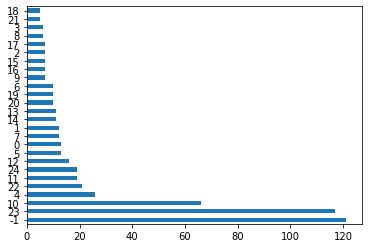

In [12]:
df_male_w2v.cluster_hdb.value_counts().plot(kind='barh')

#### w2v male agglomerative clust

<AxesSubplot:>

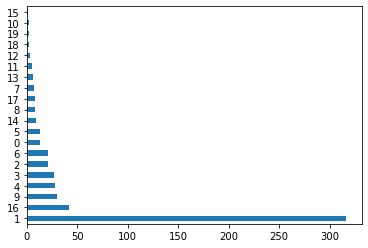

In [13]:
df_male_w2v.clust_ag.value_counts().plot(kind='barh')

#### FT male HDB

<AxesSubplot:>

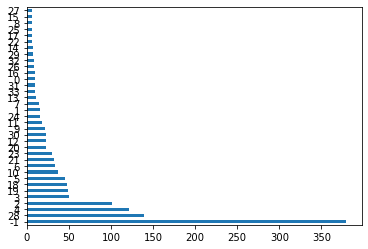

In [14]:
df_male_ft.cluster_hdb.value_counts().plot(kind='barh')

#### FT male agglomerative clust

<AxesSubplot:>

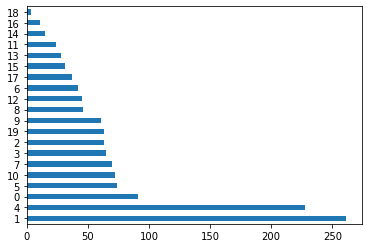

In [15]:
df_male_ft.clust_ag.value_counts().plot(kind='barh')

### Visualize clusters based on word counts

<AxesSubplot:ylabel='cluster_hdb'>

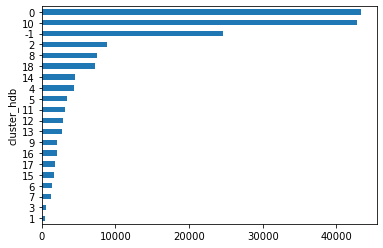

In [16]:
#cluster words overall count in text
df_female_w2v.groupby(['cluster_hdb'])['count'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

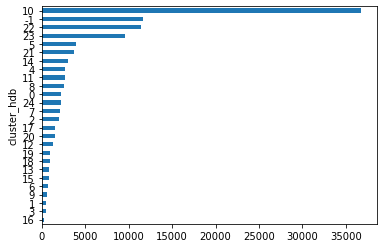

In [17]:
df_male_w2v.groupby(['cluster_hdb'])['count'].sum().sort_values().plot(kind='barh')

### Visualize cluster counts based on median effect size

<AxesSubplot:ylabel='cluster_hdb'>

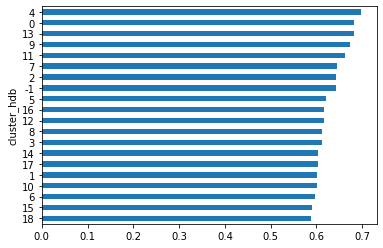

In [18]:
df_female_w2v.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

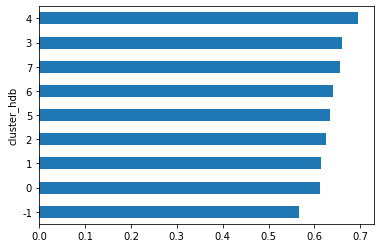

In [19]:
df_female_ft.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

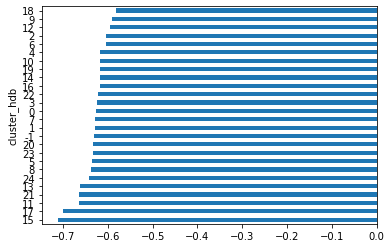

In [20]:
df_male_w2v.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

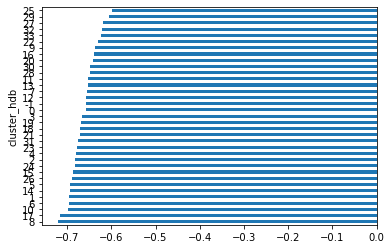

In [21]:
df_male_ft.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

## Relationship between effect size and count?

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

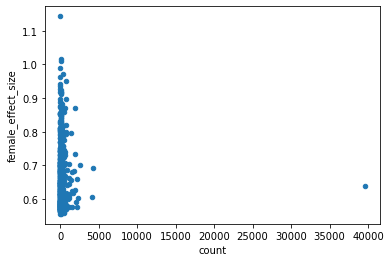

In [22]:
df_female_w2v.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

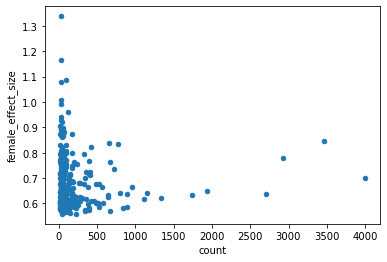

In [23]:
df_female_ft.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

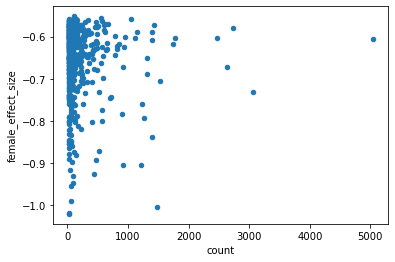

In [24]:
df_male_w2v.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

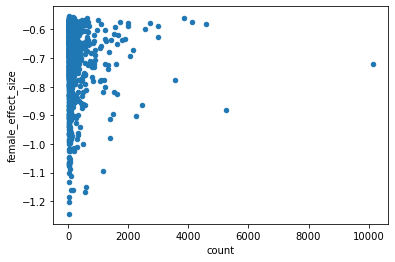

In [25]:
df_male_ft.plot.scatter(x='count', y='female_effect_size')

### Female

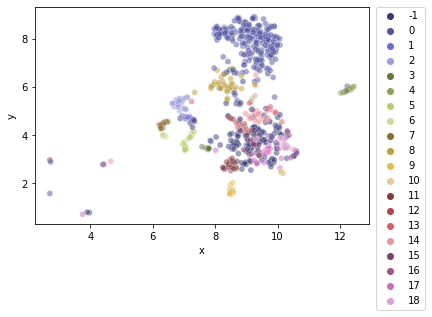

In [26]:
ax=sns.scatterplot(data=df_female_w2v, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

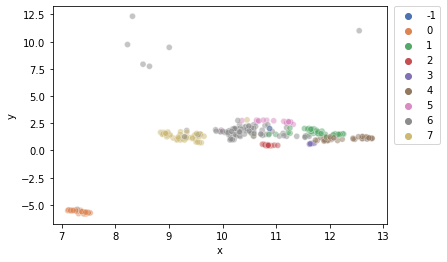

In [27]:
ax=sns.scatterplot(data=df_female_ft, x="x", y="y", hue='cluster_hdb',  palette="deep", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [28]:
#how many words match
len(set(df_female_ft.index.tolist())&set(df_female_w2v.index.tolist()))

39

In [29]:
set(df_female_ft.index.tolist())&set(df_female_w2v.index.tolist())

{'b1',
 'ehis-e',
 'eriarsti',
 'ilmnema',
 'kasvama',
 'kehvema',
 'kõrgema',
 'langema',
 'levima',
 'logopeedi',
 'madalama',
 'magistrikraadi',
 'muretsema',
 'noores',
 'oskama',
 'pedagoogilise',
 'ppa-s',
 'psühhiaatri',
 'psühholooge',
 'psühholoogi',
 'psüühikahäirega',
 'põhikooli',
 'põhikooli-',
 'põhikoolis',
 'ravi',
 'ravi-',
 'sõlmima',
 'sündi',
 'sündima',
 'süvenema',
 'tavaklassis',
 'tavakooli',
 'täiskasvanuid',
 'vajav',
 'vanemas',
 'vanemliku',
 'õpingute',
 'õppimist',
 'üldhariduskooli'}

<AxesSubplot:>

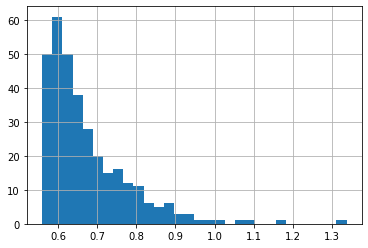

In [63]:
df_female_ft.female_effect_size.hist(bins=30)

<AxesSubplot:>

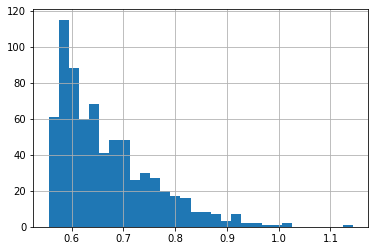

In [64]:
df_female_w2v.female_effect_size.hist(bins=30)

<AxesSubplot:>

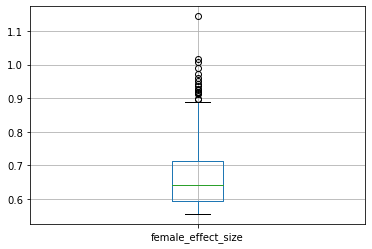

In [69]:
df_female_w2v.boxplot(column=['female_effect_size'])  

<AxesSubplot:>

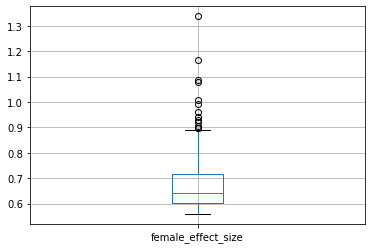

In [70]:
df_female_ft.boxplot(column=['female_effect_size'])  

### Male

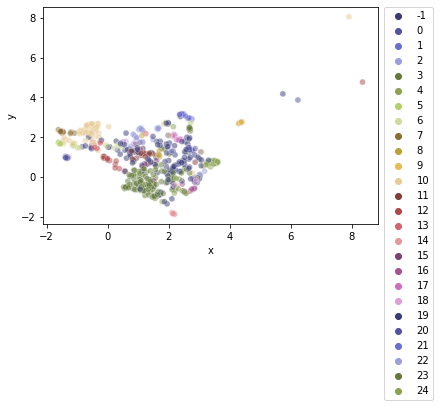

In [30]:
ax=sns.scatterplot(data=df_male_w2v, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

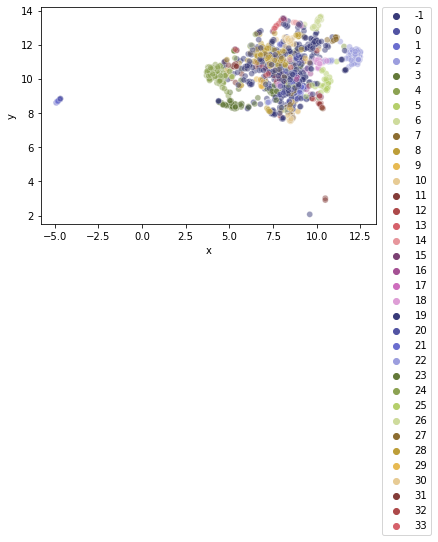

In [31]:
ax=sns.scatterplot(data=df_male_ft, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [32]:
len(set(df_male_ft.index.tolist())&set(df_male_w2v.index.tolist()))

80

In [33]:
#same in both vectors
set(df_male_ft.index.tolist())&set(df_male_w2v.index.tolist())

{'agenda',
 'andrus',
 'angela',
 'aplaus',
 'armee',
 'barack',
 'edulugu',
 'ekre-ga',
 'eliit',
 'esimehena',
 'garant',
 'hoiatan',
 'huumoriga',
 'huviga',
 'iseseisvus',
 'jalajälg',
 'juhina',
 'jutupunkte',
 'jürgenson',
 'kalkulatsioon',
 'kalvi',
 'kandsin',
 'kannimäe',
 'katsu',
 'keerata',
 'kiita',
 'kirves',
 'koka',
 'kokal',
 'kokk',
 'kummardus',
 'käibega',
 'kõve',
 'laaneots',
 'latt',
 'legitiimsus',
 'loosungiga',
 'loosungit',
 'läbimurre',
 'lärm',
 'lävel',
 'lõpp',
 'mantrat',
 'michal',
 'mihkelson',
 'näoga',
 'näpuga',
 'oliver',
 'pannes',
 'patriotism',
 'patt',
 'peasekretär',
 'pildilt',
 'pomerants',
 'päevakord',
 'püüdlus',
 'reiting',
 'retoorikat',
 'režiimiga',
 'riisalu',
 'rõõm',
 'sinagi',
 'stenogramm',
 'suveräänsus',
 'sõerd',
 'sõna-sõnalt',
 'templit',
 'territoorium',
 'torm',
 'trump',
 'tugevus',
 'tööplaan',
 'uhkus',
 'umbusaldada',
 'viidik',
 'võit',
 'võrklaev',
 'ülbus',
 'üleliia',
 'üpris'}

<AxesSubplot:>

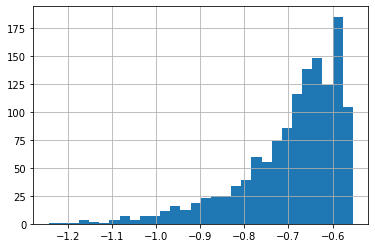

In [65]:
df_male_ft.female_effect_size.hist(bins=30)

<AxesSubplot:>

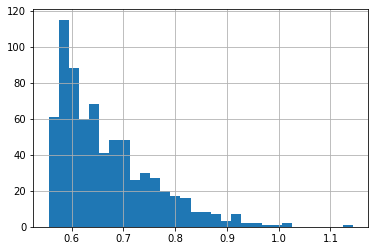

In [66]:
df_female_w2v.female_effect_size.hist(bins=30)

<AxesSubplot:>

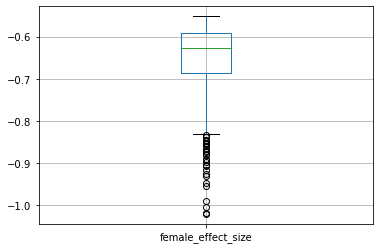

In [67]:
df_male_w2v.boxplot(column=['female_effect_size'])  

<AxesSubplot:>

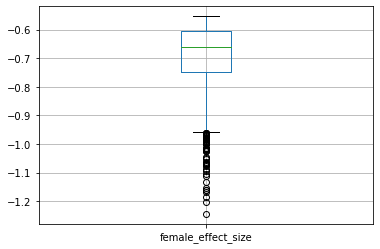

In [68]:
df_male_ft.boxplot(column=['female_effect_size'])  

## Male in w2v but female in FT

In [61]:
set(df_female_ft.index.tolist())&set(df_male_w2v.index.tolist())

set()

## Female in FT but male in w2v

In [62]:
set(df_male_ft.index.tolist())&set(df_female_w2v.index.tolist())

{'vedu'}

## Try to see some female words

In [34]:
#words most female
df_female_w2v.sort_values('female_effect_size', ascending=False).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
juurutama,1.143367,0.000385,13,0,9.635041,7.861023,20,female
finantseerima,1.017046,0.001592,10,0,9.237131,7.696671,56,female
valmima,1.008965,0.001881,16,0,8.038519,8.096758,111,female
harjuma,0.988480,0.002135,13,0,8.768991,8.875234,21,female
taotlema,0.971773,0.002301,11,0,9.673896,7.553660,377,female
käivituma,0.961220,0.002586,13,0,8.208339,8.222179,26,female
töötama,0.952283,0.002839,11,0,8.888930,7.702555,821,female
määratlema,0.942401,0.003157,13,0,9.371265,8.539078,35,female
lisanduma,0.935941,0.002811,10,0,8.545391,8.006986,40,female
tõstatama,0.927435,0.003317,19,0,9.759993,8.527399,24,female


In [35]:
#words most female
df_female_ft.sort_values('female_effect_size', ascending=False).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
psüühika-,1.337927,0.000043,3,6,10.034159,1.672838,23,female
psüühikahäirega,1.164181,0.000307,3,6,9.962230,1.710349,31,female
õppe-,1.086988,0.000781,0,7,9.263881,1.091607,95,female
psüühikahäire,1.078061,0.000909,3,6,10.137133,1.761380,29,female
kehvemasse,1.007580,0.001547,15,3,11.713019,0.662870,27,female
nooremas,0.993021,0.001899,2,6,11.541716,1.254105,32,female
täiskasvanu,0.960464,0.002331,2,6,10.212821,1.001810,114,female
täiskasvanuna,0.941072,0.003254,2,6,10.183019,1.019229,27,female
õppejõu,0.930382,0.003201,9,7,9.225064,1.020131,28,female
neiu,0.922881,0.003975,3,7,10.569844,1.366204,36,female


## See some male words

In [36]:
df_male_w2v.sort_values('female_effect_size', ascending=True).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
sõerdile,-1.021268,0.998612,16,5,-1.574706,1.658165,30,male
peangi,-1.018271,0.998401,1,1,2.760018,2.916470,20,male
jaanus,-1.004130,0.998263,0,10,-0.673930,2.131979,1477,male
krimm,-0.989838,0.997932,1,12,0.551765,0.279491,52,male
okupeerinud,-0.955118,0.997177,1,23,1.756345,1.445126,52,male
välisministrile,-0.947992,0.996986,3,-1,0.067607,1.509243,85,male
hansson,-0.931199,0.996750,3,13,-0.384500,1.442010,92,male
õnne,-0.925720,0.996429,7,24,2.074904,-0.051207,439,male
viimse,-0.916476,0.996413,1,23,2.022612,1.156509,40,male
andrus,-0.906184,0.996096,9,10,-0.929041,2.292151,1215,male


In [37]:
df_male_ft.sort_values('female_effect_size', ascending=True).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
loosungiga,-1.244283,0.999865,10,2,12.384358,11.696504,31,male
tormata,-1.202379,0.999771,5,4,3.907009,10.012736,35,male
ideena,-1.183721,0.999731,3,5,10.622167,9.758638,27,male
nimekiri,-1.166723,0.999666,1,28,11.647769,10.540583,548,male
toompea,-1.161083,0.999634,2,-1,9.992006,12.730493,171,male
tuld,-1.160888,0.999632,1,-1,10.173042,11.258535,90,male
lipu,-1.151933,0.999635,16,20,7.974348,9.155059,592,male
käekiri,-1.131399,0.999541,1,28,8.982874,12.527805,26,male
top-up,-1.112270,0.999385,19,18,9.434256,10.492332,87,male
barack,-1.102836,0.999403,19,-1,8.645186,10.471523,31,male


## Clusters with highest female median scores

### Female

In [38]:
df_female_w2v.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 18    0.587914
 15    0.590381
 6     0.597728
 10    0.601868
 1     0.602309
 17    0.603552
 14    0.603983
 3     0.611304
 8     0.613171
 12    0.615988
 16    0.616685
 5     0.621271
-1     0.641923
 2     0.643240
 7     0.644667
 11    0.662436
 9     0.672905
 13    0.681936
 0     0.682258
 4     0.696766
Name: female_effect_size, dtype: float64

In [39]:
df_female_w2v[df_female_w2v.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
kõrgema,0.871028,0.005556,14,5,7.237442,3.984995,674,female
madala,0.816420,0.008236,14,5,7.254707,4.132850,330,female
madalama,0.793752,0.010286,14,5,7.192187,3.927781,387,female
vähese,0.746549,0.014687,14,5,7.329712,4.139655,298,female
täiendavaid,0.704349,0.020783,17,5,7.037156,3.366108,1107,female
värskemaid,0.681372,0.024124,12,5,7.006704,3.527511,27,female
ennetavaid,0.653164,0.027809,12,5,7.071292,3.437703,29,female
kaasamata,0.632008,0.030812,12,5,9.188982,5.530156,49,female
lihtsamaid,0.621271,0.035069,12,5,7.075998,3.492404,59,female
elektroonilisi,0.620575,0.032103,12,5,7.027740,3.443848,76,female


In [40]:
df_female_ft.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
-1    0.566590
 0    0.612225
 1    0.615174
 2    0.624965
 5    0.632836
 6    0.640821
 7    0.655614
 3    0.660072
 4    0.694861
Name: female_effect_size, dtype: float64

In [41]:
df_female_ft[df_female_ft.cluster_hdb==4]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
kehvemal,0.905584,0.004274,1,4,11.885543,1.000522,20,female
kehvemas,0.888232,0.004608,1,4,11.950114,0.910017,59,female
piinlikum,0.873575,0.004870,1,4,12.604458,1.086848,21,female
kehvem,0.872345,0.005460,1,4,12.143444,0.917112,170,female
kehvemat,0.803672,0.010222,1,4,11.946863,0.981941,24,female
vaesem,0.793525,0.009976,1,4,12.432180,1.126891,55,female
kummalisem,0.782606,0.010910,1,4,12.703606,1.126564,37,female
tõenäolisem,0.778619,0.012121,1,4,12.698220,1.147845,48,female
sügavam,0.769540,0.012774,1,4,12.615482,1.255519,95,female
sobivam,0.760789,0.014775,1,4,12.773618,1.102872,51,female


In [42]:
df_female_ft[df_female_ft.cluster_hdb==7]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
õppe-,1.086988,0.000781,0,7,9.263881,1.091607,95,female
õppejõu,0.930382,0.003201,9,7,9.225064,1.020131,28,female
neiu,0.922881,0.003975,3,7,10.569844,1.366204,36,female
tavakooli,0.875551,0.005139,9,7,8.927985,1.553022,49,female
b2,0.866227,0.006111,12,7,9.604037,0.717400,58,female
...,...,...,...,...,...,...,...,...
üldhariduskooli,0.576064,0.045670,9,7,8.955472,1.544405,29,female
noodi,0.574837,0.046969,9,7,8.932563,1.600862,23,female
õpilase,0.573590,0.048230,0,7,9.294493,1.271629,393,female
õppimas,0.573096,0.045409,9,7,9.321971,1.201464,24,female


In [43]:
df_female_ft[df_female_ft.cluster_hdb==6]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
psüühika-,1.337927,0.000043,3,6,10.034159,1.672838,23,female
psüühikahäirega,1.164181,0.000307,3,6,9.962230,1.710349,31,female
psüühikahäire,1.078061,0.000909,3,6,10.137133,1.761380,29,female
nooremas,0.993021,0.001899,2,6,11.541716,1.254105,32,female
täiskasvanu,0.960464,0.002331,2,6,10.212821,1.001810,114,female
...,...,...,...,...,...,...,...,...
vananeva,0.572004,0.045665,19,6,10.842675,2.356231,62,female
%,0.570208,0.045926,12,6,9.289685,1.264240,24,female
nakkushaiguse,0.569120,0.047602,3,6,10.314016,1.721584,79,female
leiva,0.564598,0.047133,19,6,10.490474,2.257112,71,female


In [44]:
df_female_ft[df_female_ft.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
"‑,",0.796939,0.010012,12,5,9.973598,1.879182,96,female
aab,0.796828,0.009162,13,5,10.360511,2.752401,325,female
napib,0.765256,0.012556,16,5,10.643558,2.661199,196,female
kasvav,0.757259,0.012795,14,5,11.262161,2.622675,233,female
süveneb,0.686247,0.021159,16,5,10.953076,2.732463,180,female
süvenev,0.684575,0.021652,16,5,11.200891,2.623824,37,female
kasva,0.680282,0.023655,14,5,11.185456,2.608971,279,female
kasvamas,0.645596,0.030815,14,5,11.268342,2.613021,99,female
kasvava,0.640889,0.032438,14,5,11.203237,2.616854,166,female
kasvab,0.638323,0.031190,14,5,11.140501,2.683856,2707,female


In [45]:
df_female_ft[df_female_ft.cluster_hdb==2]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
õppesse,0.868800,0.005779,4,2,10.807843,0.442191,29,female
asjasse,0.769020,0.012261,4,2,10.912247,0.438546,399,female
hooldekodusse,0.694477,0.022710,4,2,10.779656,0.565811,72,female
haiglasse,0.681555,0.023377,4,2,10.742759,0.574880,266,female
puusse,0.653087,0.028076,4,2,10.877280,0.446954,43,female
kuusse,0.644100,0.027969,4,2,10.826864,0.480060,20,female
noortesse,0.642810,0.028377,4,2,10.849909,0.451000,23,female
lahku,0.626152,0.033743,4,2,10.842749,0.528587,278,female
emo-sse,0.623778,0.034308,4,2,10.848776,0.485893,43,female
tartusse,0.610518,0.036743,4,2,10.791874,0.511995,221,female


In [46]:
df_female_ft[df_female_ft.cluster_hdb==1]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
noorema,0.882632,0.004989,5,1,11.593460,1.436447,67,female
kumu,0.804599,0.009642,3,1,10.532447,1.607972,40,female
kehvema,0.797386,0.009671,5,1,11.931400,1.196676,46,female
vaesema,0.689411,0.023087,5,1,11.694815,1.579133,38,female
raskema,0.684448,0.022993,5,1,12.037684,1.337107,47,female
vanema,0.677937,0.023655,10,1,11.258389,1.592370,481,female
kergema,0.675139,0.023904,5,1,11.917046,1.487332,62,female
kasvama,0.674947,0.023291,5,1,11.610394,2.029435,525,female
halvema,0.674133,0.025431,5,1,11.911430,1.319452,31,female
õppima,0.665621,0.026823,10,1,11.639400,1.939004,959,female


In [47]:
df_female_ft[df_female_ft.cluster_hdb==0]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
443,0.780385,0.011931,11,0,7.476399,-5.673831,33,female
619,0.725981,0.016366,11,0,7.438532,-5.793808,25,female
319,0.696438,0.022475,11,0,7.312816,-5.797386,25,female
513,0.694330,0.020818,11,0,7.369381,-5.673068,42,female
613,0.675638,0.024851,11,0,7.352229,-5.640230,25,female
725,0.665155,0.025650,11,0,7.352275,-5.501101,27,female
357,0.658513,0.026071,11,0,7.373418,-5.606141,23,female
313,0.654957,0.028047,11,0,7.168989,-5.536407,25,female
39%,0.654731,0.029267,11,0,7.297061,-5.508478,64,female
434,0.648433,0.029409,11,0,7.510612,-5.723145,25,female


### Male

In [48]:
df_male_ft.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 8    -0.720913
 17   -0.716080
 10   -0.698120
 6    -0.694866
 1    -0.694566
 14   -0.693734
 5    -0.692701
 26   -0.689394
 15   -0.687362
 24   -0.681173
 2    -0.680988
 4    -0.680490
 23   -0.678033
 31   -0.674806
 21   -0.670588
 18   -0.670250
 19   -0.667749
 3    -0.667253
 0    -0.658267
-1    -0.657993
 12   -0.657977
 7    -0.654037
 13   -0.652923
 11   -0.651993
 28   -0.648854
 30   -0.648600
 20   -0.642290
 16   -0.638133
 9    -0.637542
 22   -0.629655
 33   -0.622144
 32   -0.621281
 27   -0.618766
 29   -0.605820
 25   -0.598700
Name: female_effect_size, dtype: float64

In [49]:
df_male_ft[df_male_ft.cluster_hdb==17]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
veebileht,-0.909253,0.996118,4,17,9.053320,13.146708,26,male
veebilehel,-0.753745,0.986074,4,17,9.135563,13.115005,137,male
veebilehe,-0.742519,0.985301,4,17,9.070722,13.185052,55,male
koduleht,-0.689640,0.979588,4,17,9.065339,13.166763,21,male
kodulehe,-0.673808,0.973597,4,17,9.067822,13.177305,28,male
kodulehekülg,-0.593787,0.957136,4,17,9.100713,13.131932,21,male


In [50]:
df_male_ft[df_male_ft.cluster_hdb==10]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
portfellis,-0.963207,0.997534,3,10,8.730397,12.059790,32,male
lootis,-0.951995,0.997429,1,10,7.680960,12.305597,32,male
sõitis,-0.916304,0.996231,0,10,6.080849,8.367376,103,male
mängis,-0.852803,0.993690,2,10,4.762864,11.053499,47,male
pildis,-0.847405,0.992745,3,10,8.631122,12.400560,175,male
kotis,-0.811270,0.990925,3,10,8.239276,12.304158,51,male
sahtlis,-0.804775,0.990954,3,10,8.362933,12.314973,63,male
ketis,-0.791206,0.988912,3,10,8.274526,12.352696,38,male
tornis,-0.775346,0.987415,3,10,8.295581,12.383965,33,male
äris,-0.757852,0.985518,3,10,8.406983,12.270586,39,male


In [51]:
df_male_ft[df_male_ft.cluster_hdb==6]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
visalt,-0.993296,0.998033,4,6,10.170958,13.591833,42,male
uhkelt,-0.898392,0.995354,4,6,10.024963,13.399196,101,male
räpakalt,-0.884142,0.994913,4,6,10.264549,13.618093,22,male
pildilt,-0.883777,0.995273,4,6,9.785580,12.989670,20,male
toompealt,-0.876634,0.994233,2,6,9.993071,12.968458,27,male
uhke,-0.818889,0.991353,19,6,6.247165,11.842174,316,male
laudadelt,-0.814194,0.991198,4,6,9.893619,12.954744,26,male
hoogsalt,-0.804157,0.989792,4,6,10.207795,13.613438,83,male
usinalt,-0.794907,0.989440,4,6,10.176629,13.551802,66,male
tuult,-0.784571,0.988965,0,6,10.081781,13.154984,95,male


In [52]:
df_male_ft[df_male_ft.cluster_hdb==14]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
ajaleht,-0.819695,0.991720,1,14,8.907084,13.198334,98,male
ajalehe,-0.756771,0.986238,1,14,8.936380,13.192472,86,male
päevaleht,-0.736892,0.984141,1,14,8.681444,13.313769,66,male
õhtuleht,-0.693734,0.977587,4,14,8.892493,13.262004,35,male
äripäev,-0.680927,0.975386,1,14,8.173429,13.512901,46,male
päevalehe,-0.650463,0.971611,1,14,8.803303,13.305324,63,male
õhtulehe,-0.571831,0.953653,4,14,8.937371,13.233051,39,male


In [53]:
df_male_ft[df_male_ft.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
ideena,-1.183721,0.999731,3,5,10.622167,9.758638,27,male
veena,-1.048293,0.998978,3,5,10.642095,9.558666,38,male
masina,-0.988156,0.997879,3,5,10.456399,9.518234,26,male
regina,-0.987103,0.997843,3,5,10.607503,9.584203,26,male
näitena,-0.940892,0.997118,3,5,10.672376,9.844067,384,male
kana,-0.905419,0.996365,9,5,10.521969,9.404398,77,male
sinagi,-0.904248,0.996002,4,5,9.916980,9.551494,26,male
jõuluvana,-0.901913,0.995647,4,5,10.390475,9.516273,186,male
pagana,-0.899416,0.995365,3,5,10.520828,9.494072,32,male
näidetena,-0.882792,0.995011,3,5,10.673123,9.849064,22,male


In [54]:
df_male_w2v.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 15   -0.711778
 17   -0.699287
 11   -0.663897
 21   -0.663516
 13   -0.662770
 24   -0.641110
 8    -0.637718
 5    -0.636074
 23   -0.633952
 20   -0.633385
-1    -0.631080
 1    -0.629136
 7    -0.627704
 0    -0.625395
 3    -0.624610
 22   -0.622789
 16   -0.618555
 14   -0.618506
 19   -0.617536
 10   -0.617502
 4    -0.616746
 6    -0.604902
 2    -0.604050
 12   -0.595802
 9    -0.590942
 18   -0.582813
Name: female_effect_size, dtype: float64

In [55]:
df_male_w2v[df_male_w2v.cluster_hdb==15]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
opositsioonis,-0.800530,0.990893,2,15,1.321588,0.652633,568,male
ekre-ga,-0.760700,0.985888,1,15,2.906136,-0.031206,37,male
valimisplatvormis,-0.743324,0.985144,1,15,1.260316,0.618566,20,male
ridades,-0.711778,0.981127,1,15,1.212122,0.659134,46,male
valitsusvastutust,-0.699168,0.977654,1,15,1.601307,0.820247,33,male
tööplaan,-0.631808,0.968588,1,15,1.508077,-0.205409,33,male
ridadest,-0.631276,0.966263,1,15,1.405721,0.718502,55,male


In [56]:
df_male_w2v[df_male_w2v.cluster_hdb==17]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
kiites,-0.790157,0.989710,1,17,2.165288,2.142578,31,male
kiidaks,-0.759746,0.986617,1,17,2.205205,2.087392,22,male
kiita,-0.744312,0.985924,10,17,2.405173,1.899569,710,male
tunnustada,-0.699287,0.979633,10,17,2.352093,1.897318,591,male
õnnitleda,-0.591208,0.958253,1,17,2.254121,1.865974,64,male
umbusaldada,-0.584992,0.955822,1,17,2.315620,1.851982,23,male
kiidame,-0.578620,0.954316,1,17,2.128693,2.056344,100,male


In [57]:
df_male_w2v[df_male_w2v.cluster_hdb==11]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
ennegi,-0.881435,0.994895,3,11,1.005345,1.208171,146,male
varemgi,-0.819392,0.992267,3,11,1.158525,1.181750,215,male
möödaminnes,-0.795697,0.989828,1,11,1.149158,1.200108,57,male
ennist,-0.760200,0.987267,3,11,1.032056,1.304240,255,male
ettekannetes,-0.740961,0.985243,3,11,1.097453,1.081849,63,male
otsesõnu,-0.723621,0.982362,16,11,0.754167,1.219220,88,male
meeleavaldustel,-0.687163,0.977433,1,11,0.944729,0.939383,25,male
avalikult,-0.671327,0.974480,3,11,0.880002,1.246164,913,male
selgesõnaliselt,-0.667838,0.972641,1,11,1.020750,1.237900,37,male
saaliski,-0.663897,0.973419,3,11,1.215179,1.186013,91,male


In [58]:
df_male_w2v[df_male_w2v.cluster_hdb==21]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
aseesimehe,-0.676938,0.977244,8,21,0.512631,1.762169,439,male
esimehe,-0.673070,0.974057,8,21,0.443389,1.689691,2631,male
aseesimehele,-0.663516,0.974267,16,21,0.490792,1.658223,29,male
esimehele,-0.641528,0.970878,8,21,0.502493,1.653221,412,male
esimehel,-0.640765,0.968860,8,21,0.445609,1.629541,185,male


In [59]:
df_male_w2v[df_male_w2v.cluster_hdb==13]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
hansson,-0.931199,0.996750,3,13,-0.384500,1.442010,92,male
terras,-0.802306,0.989877,16,13,-0.534872,1.574565,31,male
ardo,-0.794590,0.989879,3,13,-0.372097,1.423865,117,male
sten,-0.693283,0.978161,6,13,-0.473250,1.743792,46,male
rask,-0.682398,0.976620,6,13,-0.420565,1.531457,51,male
naljaga,-0.662770,0.972743,1,13,1.083238,1.388883,33,male
spetsialistina,-0.651903,0.971340,1,13,1.251823,2.174999,23,male
edgar,-0.620563,0.966108,9,13,-0.247652,1.770398,213,male
marju,-0.595167,0.958078,3,13,-0.342498,1.440754,152,male
õiguskantslerikandidaat,-0.574439,0.952701,1,13,-0.243251,1.708991,24,male


In [60]:
df_male_w2v[df_male_w2v.cluster_hdb==24]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender
õnne,-0.925720,0.996429,7,24,2.074904,-0.051207,439,male
kindlusega,-0.851408,0.993812,1,24,2.553518,-0.794329,52,male
vaimult,-0.739224,0.983974,1,24,1.786052,-1.250224,28,male
veendumusega,-0.721816,0.981732,1,24,2.498558,-0.761495,26,male
seistes,-0.718206,0.981451,1,24,2.152138,2.525996,87,male
suuga,-0.685283,0.978010,1,24,2.491418,-0.729605,41,male
huviga,-0.681807,0.977950,5,24,2.575878,-0.817366,315,male
kaastunnet,-0.668880,0.973530,1,24,2.009658,0.055984,31,male
rõõm,-0.663595,0.972830,7,24,1.667923,-0.730838,549,male
südamega,-0.641110,0.969064,2,24,2.448796,-0.700305,213,male
